In [ ]:
#Import Packages

In [11]:
!pip install pandas
!pip install matplotlib
!pip install numpy==1.23
!pip install scikit-learn

     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     --------------------------------------- 0.0/10.7 MB 640.0 kB/s eta 0:00:17
     --------------------------------------- 0.1/10.7 MB 525.1 kB/s eta 0:00:21
     --------------------------------------- 0.1/10.7 MB 744.7 kB/s eta 0:00:15
     --------------------------------------- 0.1/10.7 MB 656.4 kB/s eta 0:00:17
      --------------------------------------- 0.3/10.7 MB 1.3 MB/s eta 0:00:09
     - -------------------------------------- 0.4/10.7 MB 1.6 MB/s eta 0:00:07
     -- ------------------------------------- 0.6/10.7 MB 2.2 MB/s eta 0:00:05
     -- ------------------------------------- 0.6/10.7 MB 2.4 MB/s eta 0:00:05
     --- ------------------------------------ 0.9/10.7 MB 2.5 MB/s eta 0:00:04
     ---- ----------------------------------- 1.1/10.7 MB 3.0 MB/s eta 0:00:04
     ---- ----------------------------------- 1.3/10.7 MB 3.2 

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [213 lines of output]
  setup.py:71: RuntimeWarning: NumPy 1.23.0 may not yet support Python 3.11.
    warnings.warn(
  Running from numpy source directory.
  setup.py:86: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
    import numpy.distutils.command.sdist
  Processing numpy/random\_bounded_integers.pxd.in
  Processing numpy/random\bit_generator.pyx
  Processing numpy/random\mtrand.pyx
  Processing numpy/random\_bounded_integers.pyx.in
  Processing numpy/random\_common.pyx
  Processing numpy/random\_generator.pyx
  Processing numpy/random\_mt19937.pyx
  Processing

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Bkand\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Bkand\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Bkand\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\Bkand\anaconda3\Lib\site-packa

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [ ]:
#Download Data

In [7]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
response = requests.get(url)

# Save the file
with open("FuelConsumption.csv", "wb") as f:
    f.write(response.content)

print("File downloaded successfully!")

File downloaded successfully!


In [ ]:
#Read Data

In [9]:
df = pd.read_csv("FuelConsumption.csv")
df.head(5)

NameError: name 'pd' is not defined

In [13]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


In [ ]:
#Chosing data

In [ ]:
#Plotting Data

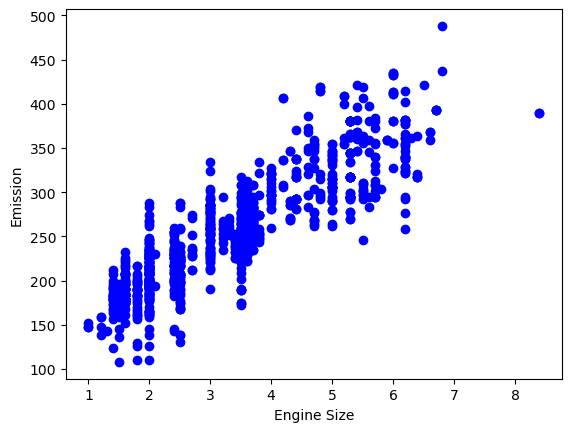

In [15]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [17]:
#Train Dataset

In [19]:
msk = np.random.rand(len(df)) <0.8
train = cdf[msk]
test = cdf[~msk]

In [21]:
#Train Data Distribution

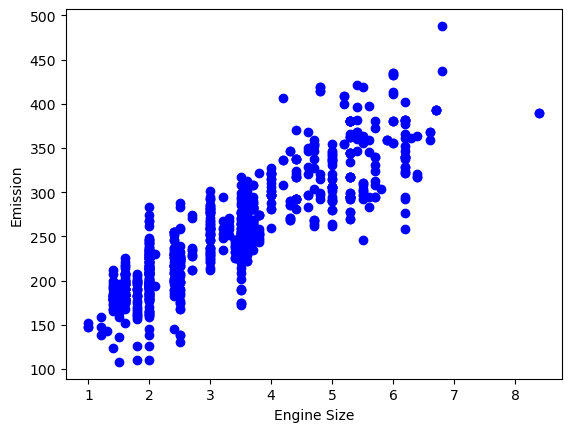

In [23]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

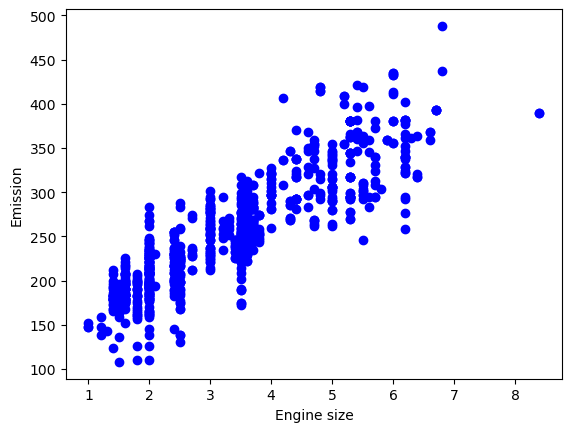

In [25]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [ ]:
#Multiple Regression Model

In [27]:
import warnings
from sklearn import linear_model

# Ignore numpy warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

regr = linear_model.LinearRegression()
x = np.asarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asarray(train[['CO2EMISSIONS']])
regr.fit(x, y)

print('Coefficients: ', regr.coef_)

Coefficients:  [[11.45439212  6.63026417  9.96366969]]


In [29]:
#Prediction

In [33]:
y_hat = regr.predict(np.asarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]))
#y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Mean Squared Error (MSE) : %.2f"
      %np.mean((y_hat - y) ** 2))
print("Variance Score: %.2f"
      %regr.score(x,y))

Mean Squared Error (MSE) : 566.68
Variance Score: 0.85


In [37]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[11.53855707  6.14526461  6.71390693  2.86807417]]
Residual sum of squares: 570.60
Variance score: 0.84


C:\Users\Bkand\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
